In [1]:
import pandas as pd

df = pd.read_csv("../Data/brent_oil_prices.csv")
df.head()

,Date,Price
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8216 entries, 0 to 8215
Data columns (total 2 columns):
Date     8216 non-null object
Price    8216 non-null float64
dtypes: float64(1), object(1)
memory usage: 128.5+ KB


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8216 entries, 0 to 8215
Data columns (total 2 columns):
Date     8216 non-null datetime64[ns]
Price    8216 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.5 KB


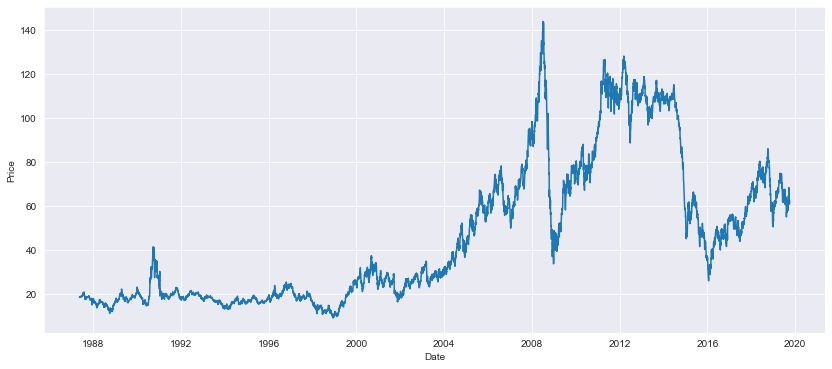

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Price'])
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [7]:
def plot_with_range(df, start_date, end_date):
    plt.figure(figsize=(14, 6))
    filtered_df = df[(df['Date'] > start_date) & (df['Date'] <= end_date)]
    plt.plot(filtered_df['Date'], filtered_df['Price'])
    plt.xlabel("Date")
    plt.ylabel("Date")
    plt.title("Brent Oil Trend")
    plt.show()

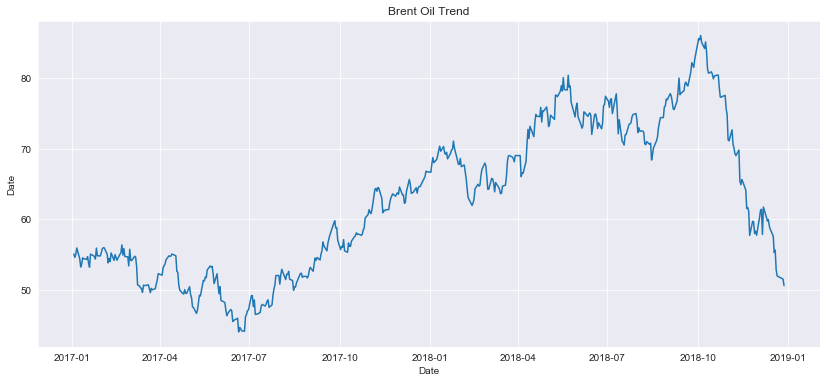

In [8]:
plot_with_range(df, '2017-01-01', '2019-01-01')

In [9]:
from fbprophet import Prophet

m = Prophet()

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [10]:
prophet_df = df
prophet_df.columns = ['ds', 'y']
prophet_df.head()

,ds,y
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [11]:
m.fit(prophet_df)
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1987-05-20,16.575176,2.209314,33.558280,16.575176,16.575176,1.041521,1.041521,1.041521,-0.405303,-0.405303,-0.405303,1.446824,1.446824,1.446824,0.0,0.0,0.0,17.616697
1,1987-05-21,16.578419,2.273107,32.959741,16.578419,16.578419,1.207201,1.207201,1.207201,-0.248608,-0.248608,-0.248608,1.455809,1.455809,1.455809,0.0,0.0,0.0,17.785621
2,1987-05-22,16.581663,2.125687,31.817027,16.581663,16.581663,1.122184,1.122184,1.122184,-0.340629,-0.340629,-0.340629,1.462813,1.462813,1.462813,0.0,0.0,0.0,17.703847
3,1987-05-25,16.591395,3.116132,32.932220,16.591395,16.591395,1.160635,1.160635,1.160635,-0.309210,-0.309210,-0.309210,1.469845,1.469845,1.469845,0.0,0.0,0.0,17.752029
4,1987-05-26,16.594639,2.645588,32.562696,16.594639,16.594639,1.045906,1.045906,1.045906,-0.421090,-0.421090,-0.421090,1.466997,1.466997,1.466997,0.0,0.0,0.0,17.640545


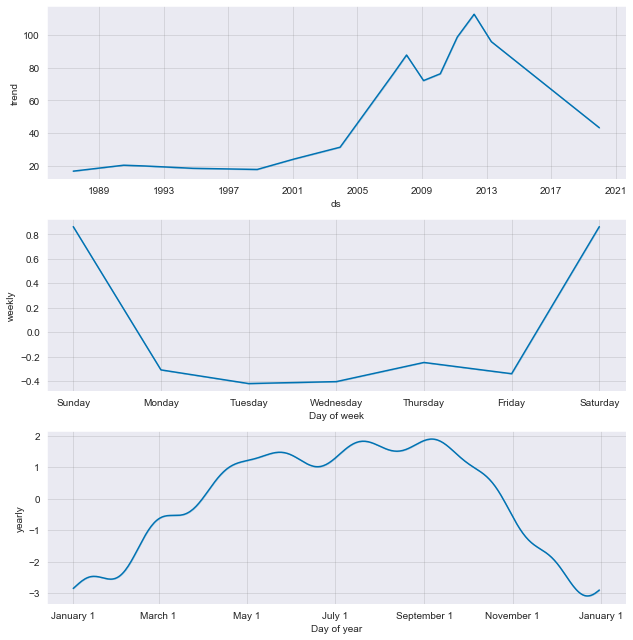

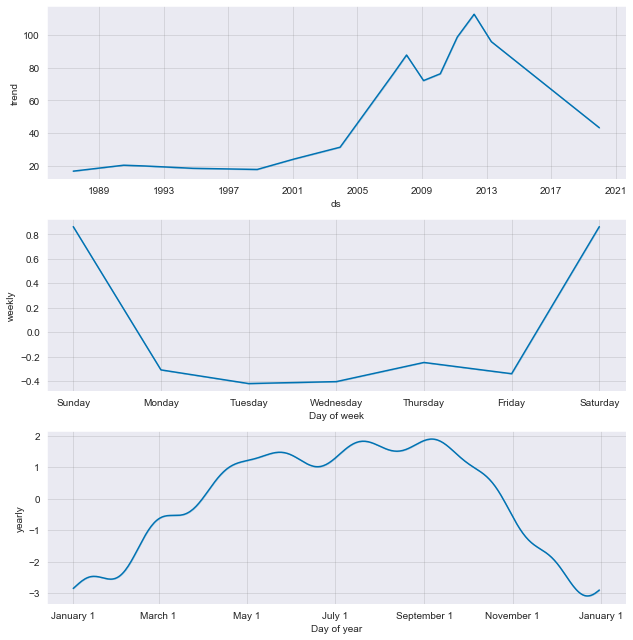

In [13]:
m.plot_components(forecast)

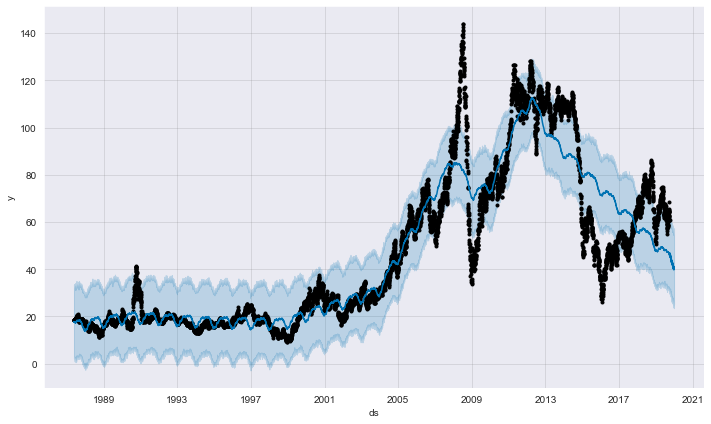

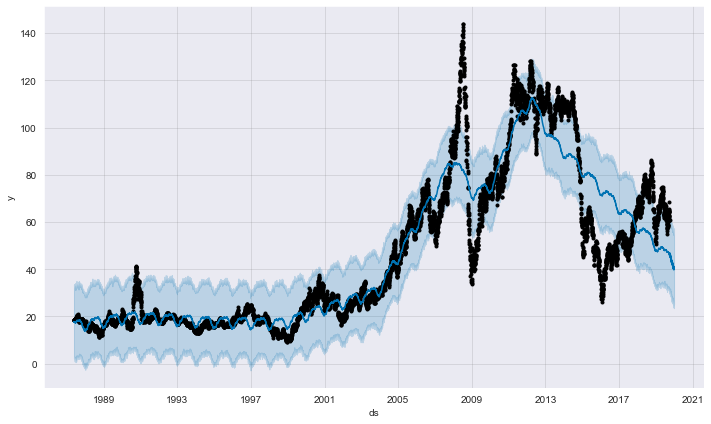

In [14]:
m.plot(forecast)

In [15]:
comp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(prophet_df.set_index('ds'))
comp_df.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
1987-05-20,17.616697,2.209314,33.558280,18.63
1987-05-21,17.785621,2.273107,32.959741,18.45
1987-05-22,17.703847,2.125687,31.817027,18.55
1987-05-25,17.752029,3.116132,32.932220,18.60
1987-05-26,17.640545,2.645588,32.562696,18.63


In [16]:
comp_df.tail()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2019-12-25,39.806681,23.496897,54.468388,NaN
2019-12-26,39.955829,24.474895,55.062264,NaN
2019-12-27,39.862032,24.550466,55.348554,NaN
2019-12-28,41.068548,26.135294,55.989910,NaN
2019-12-29,41.076652,25.154140,57.334541,NaN


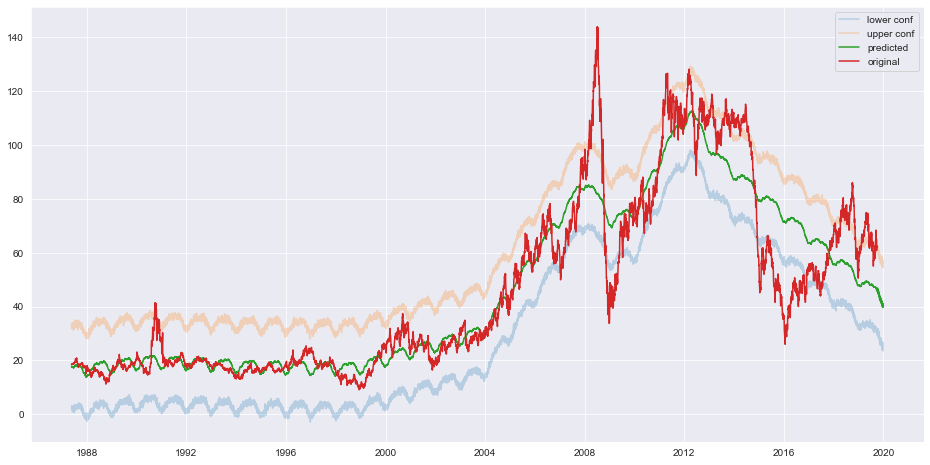

In [17]:
plt.figure(figsize=(16, 8))
plt.plot(comp_df['yhat_lower'], alpha=0.25, label="lower conf")
plt.plot(comp_df['yhat_upper'], alpha=0.25, label="upper conf")
plt.plot(comp_df['yhat'], label="predicted")
plt.plot(comp_df['y'], label="original")
plt.legend()
plt.show()

In [18]:
def plot_forecast(df, start_date, end_date):
    comp_df = df.loc[start_date:end_date]
    plt.figure(figsize=(14, 6))
    plt.plot(comp_df['yhat'], label="predicted")
    plt.plot(comp_df['y'], label="original")
    plt.legend()
    plt.show()

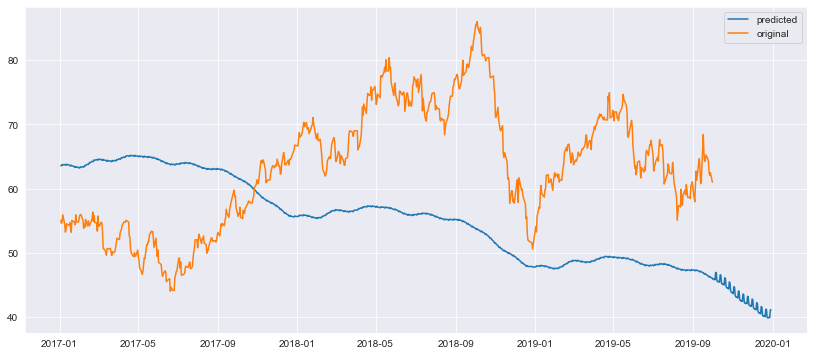

In [19]:
plot_forecast(comp_df, '2017-01-01', '2020-01-01')